# Diabetes Prediction Model Training

**Purpose:**  
Load, explore, preprocess, and train a model on the diabetes prediction dataset.

## Preprocesing

In [1]:
# Data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

np.random.seed(42)

# Set default figure size for matplotlib
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
df = pd.read_csv('../data/diabetes_dataset.csv')

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Dataframe info and statistics
df.info()
print("\nSummary statistics:\n", df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Summary statistics:
                  age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0

In [4]:
# No missing values

# Some duplicates, to be dropped
df.drop_duplicates(inplace=True)

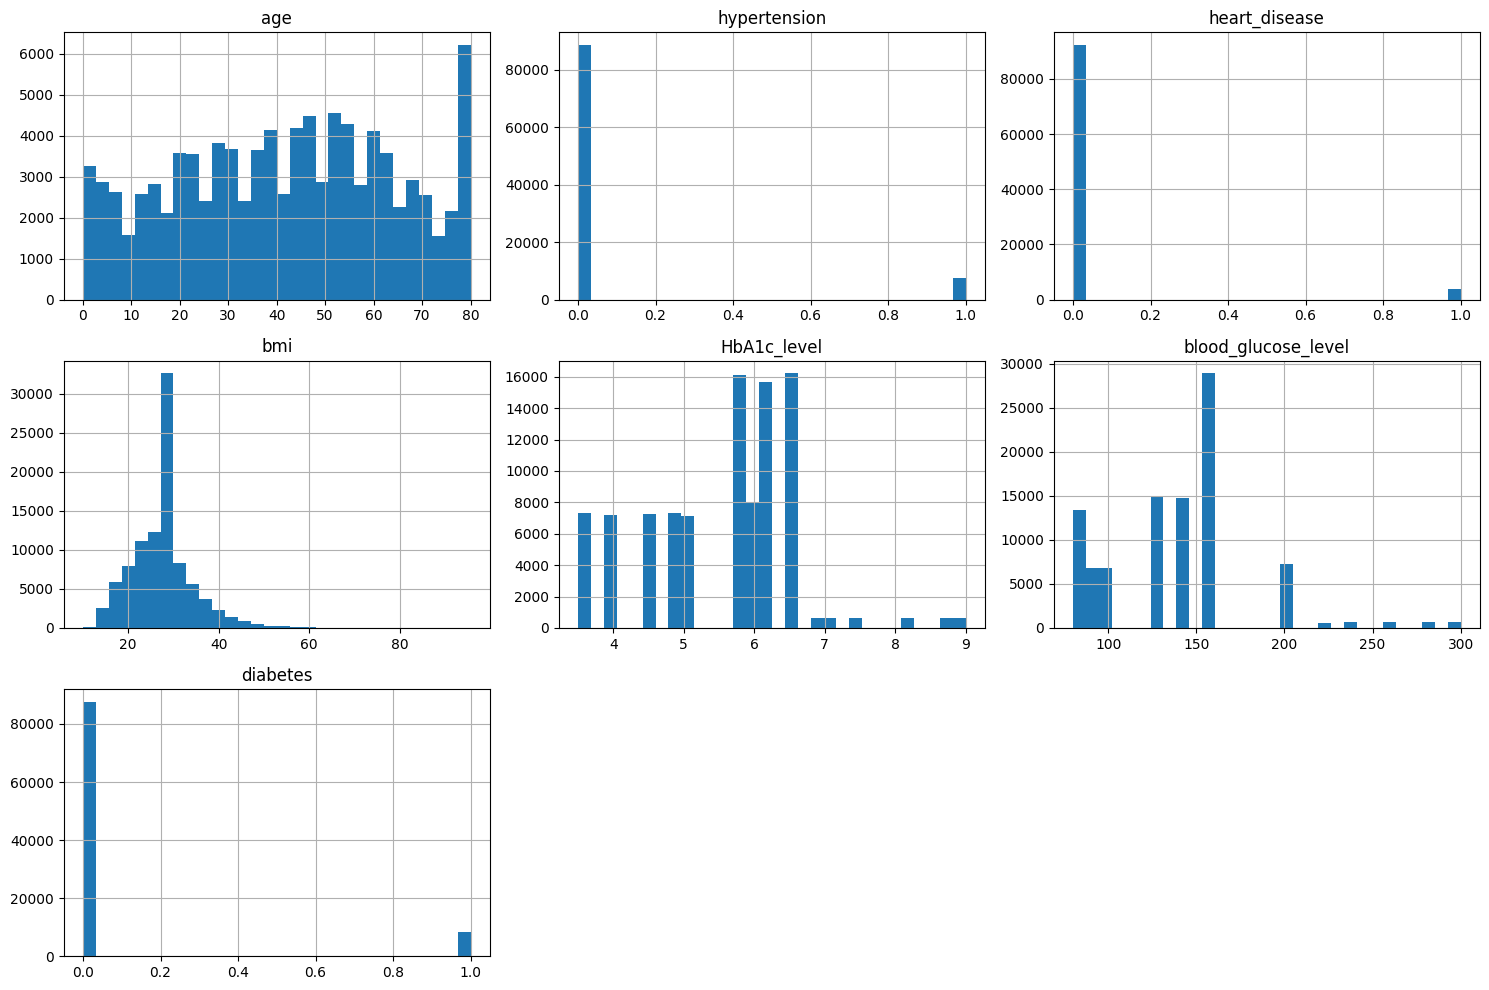

In [5]:
# Explore distributions (numerical variables only)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

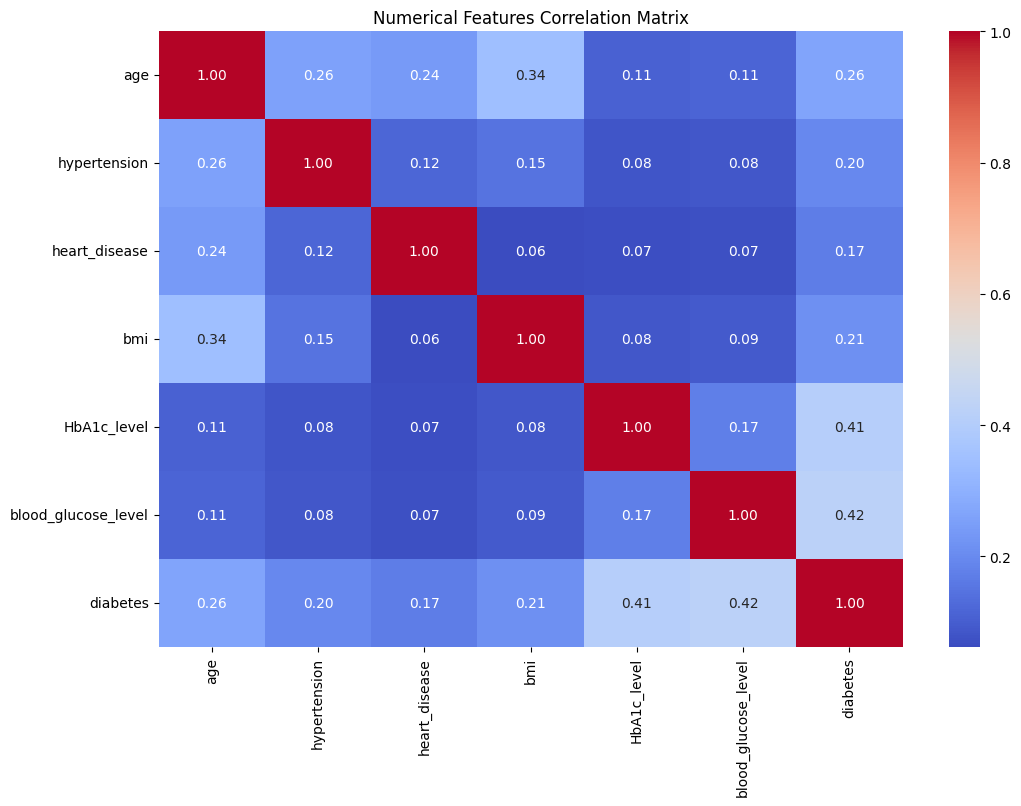

In [6]:
# Correlation matrix heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Numerical Features Correlation Matrix')
plt.show()

In [7]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Verify the transformation
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


In [8]:
# Target variable
y = df_encoded['diabetes']

# Feature variables (drop 'diabetes')
X = df_encoded.drop('diabetes', axis=1)

In [9]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (96146, 13)
Target shape: (96146,)


In [10]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (76916, 13)
Test shape: (19230, 13)


In [11]:
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs  = rs.transform(X_test)

# Display before and after scaling (first row example)
print("Original training data (first row):", X_train.iloc[0])
print("Scaled training data (first row):", X_train_rs[0])

Original training data (first row): age                             35.0
hypertension                       0
heart_disease                      0
bmi                            31.53
HbA1c_level                      6.6
blood_glucose_level              155
gender_Male                    False
gender_Other                   False
smoking_history_current        False
smoking_history_ever           False
smoking_history_former         False
smoking_history_never          False
smoking_history_not current    False
Name: 46612, dtype: object
Scaled training data (first row): [-0.22857143  0.          0.          0.65170279  0.57142857  0.25423729
  0.          0.          0.          0.          0.          0.
  0.        ]


In [29]:
assert np.all(np.isfinite(X_train_rs)), "Found non-finite feature values!"

In [12]:
X_train_rs = np.clip(X_train_rs, -5, 5)
X_test_rs = np.clip(X_test_rs, -5, 5)

print("Max value after clipping:", np.max(X_train_rs))
print("Min value after clipping:", np.min(X_train_rs))

Max value after clipping: 5.0
Min value after clipping: -2.679566563467492


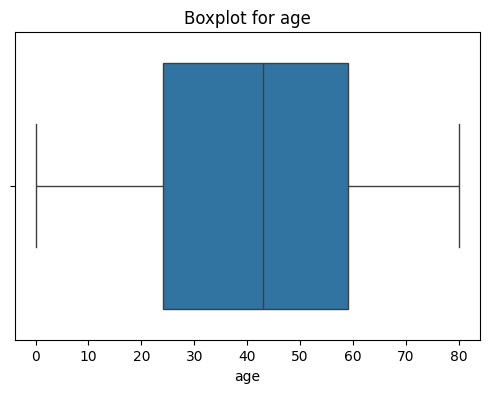

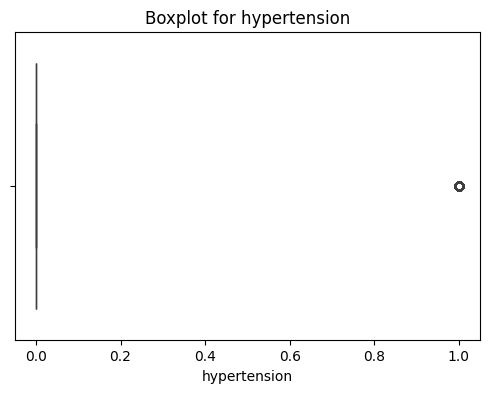

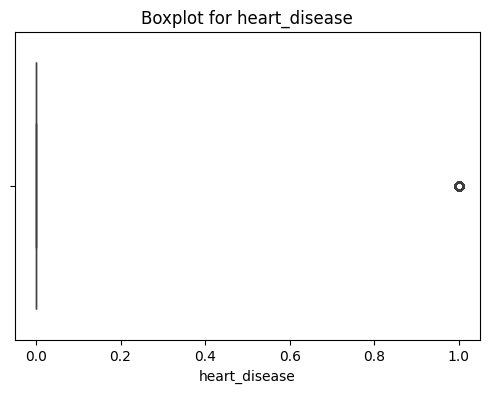

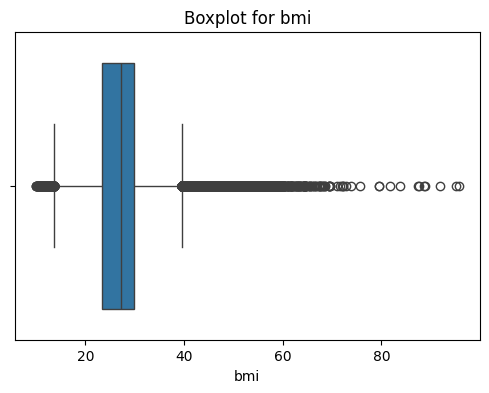

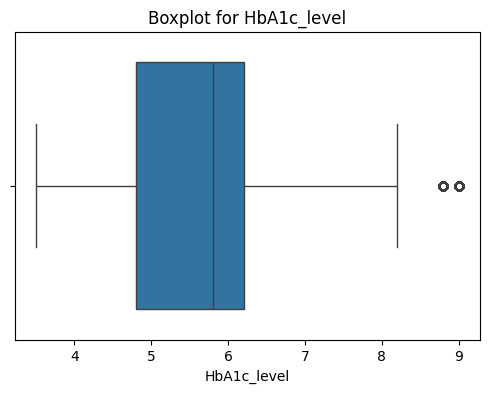

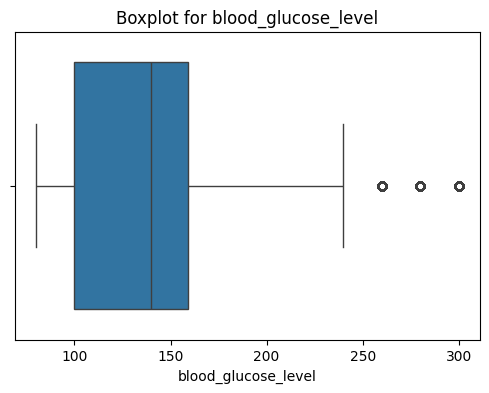

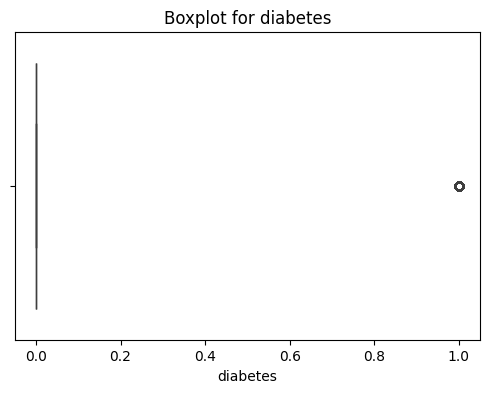

In [13]:
# Boxplot for numerical columns to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

## Model Training

### Random Forest

In [14]:
# Machine Learning model
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Model selection
from sklearn.model_selection import cross_val_score, GridSearchCV

In [15]:
rf = RandomForestClassifier(
    n_estimators=100,   
    max_depth=5,        
    random_state=42
)

rf.fit(X_train_rs, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [16]:
y_pred_rf  = rf.predict(X_test_rs)
y_proba_rf = rf.predict_proba(X_test_rs)[:, 1]

In [17]:
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

acc  = accuracy_score(y_test, y_pred_rf)
roc  = roc_auc_score(y_test, y_proba_rf)

print("Accuracy: ", round(acc, 4))
print("ROC-AUC:  ", round(roc, 4))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230

Confusion Matrix:
 [[17509     0]
 [  566  1155]]
Accuracy:  0.9706
ROC-AUC:   0.957


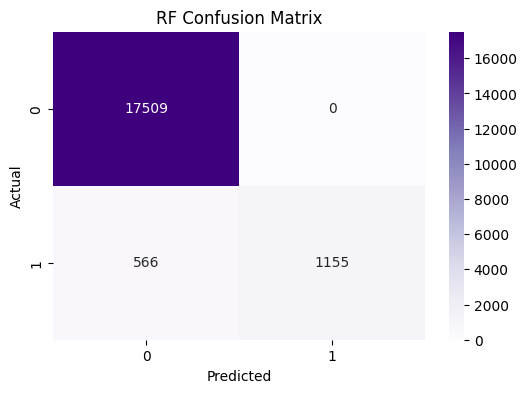

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples')
plt.title("RF Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

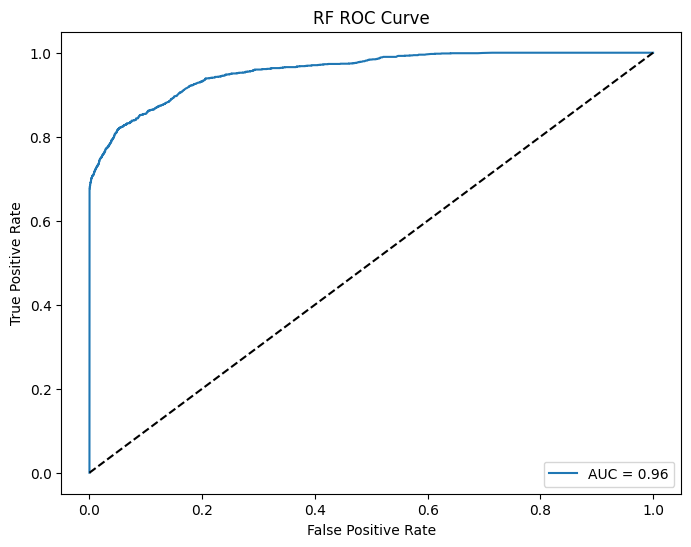

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_rf):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RF ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [20]:
cv_scores_rf = cross_val_score(
    rf, X_train_rs, y_train, cv=5, scoring='roc_auc'
)
print("RF 5-Fold CV AUC:", cv_scores_rf, "\nMean:", cv_scores_rf.mean().round(4))

RF 5-Fold CV AUC: [0.96210145 0.95603846 0.95637088 0.95749087 0.95824195] 
Mean: 0.958


In [21]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_rf.fit(X_train_rs, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF AUC:", grid_rf.best_score_.round(4))

# Use best RF
best_rf = grid_rf.best_estimator_

Best RF Params: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}
Best RF AUC: 0.9685


In [22]:
print(df_encoded.drop('diabetes',axis=1).columns.tolist())

['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']


In [23]:
import joblib, os
os.makedirs('../models', exist_ok=True)

joblib.dump(best_rf, '../models/diabetes_rf_model.pkl')
joblib.dump(rs,      '../models/robust_scaler.pkl')

['../models/robust_scaler.pkl']

### Recall-Optimized Random Forest

In [24]:
rf_recall = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,                
    class_weight='balanced',   
    random_state=42
)

rf_recall.fit(X_train_rs, y_train)
y_pred_rec = rf_recall.predict(X_test_rs)
y_proba_rec = rf_recall.predict_proba(X_test_rs)[:,1]

from sklearn.metrics import recall_score
recall_default = recall_score(y_test, y_pred_rf)
recall_balanced = recall_score(y_test, y_pred_rec)

print(f"Default RF recall:  {recall_default:.3f}")
print(f"Balanced RF recall: {recall_balanced:.3f}")

Default RF recall:  0.671
Balanced RF recall: 0.890


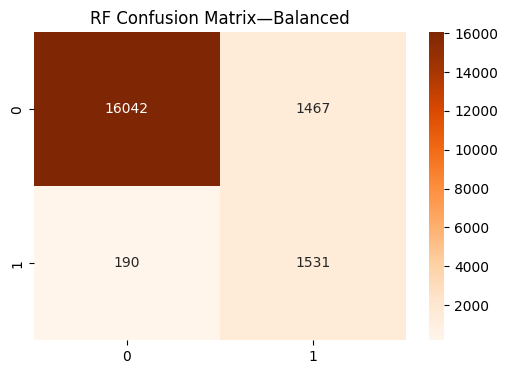

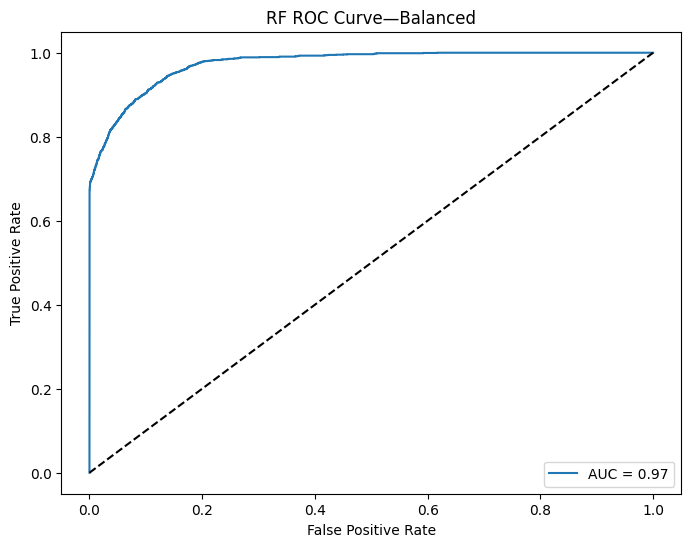

In [25]:
cm_rec = confusion_matrix(y_test, y_pred_rec)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rec, annot=True, fmt='d', cmap='Oranges')
plt.title("RF Confusion Matrix—Balanced")
plt.savefig('../models/plots/confusion_matrix_rf_balanced.png', bbox_inches='tight')

plt.figure(figsize=(8,6))
fpr_rec, tpr_rec, _ = roc_curve(y_test, y_proba_rec)
plt.plot(fpr_rec, tpr_rec, label=f"AUC = {roc_auc_score(y_test, y_proba_rec):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RF ROC Curve—Balanced")
plt.legend(loc="lower right")
plt.savefig('../models/plots/roc_curve_rf_balanced.png', bbox_inches='tight')

In [26]:
from sklearn.metrics import precision_score

rows = []
for name, y_pred, y_proba in [
    ("Default", y_pred_rf,  y_proba_rf),
    ("Balanced", y_pred_rec, y_proba_rec)
]:
    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

cmp_df = pd.DataFrame(rows).set_index("Model")
cmp_df.style.format("{:.3f}")

,Accuracy,Precision,Recall,ROC-AUC
Model,,,,
Default,0.971,1.000,0.671,0.957
Balanced,0.914,0.511,0.890,0.974


In [27]:
joblib.dump(rf_recall, '../models/diabetes_rf_recall.pkl')

['../models/diabetes_rf_recall.pkl']